In [1]:
# Importing the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import the dataset
df = pd.read_json('alert_data.json')
df.head()

,subject,currentState,repeatCount,priority,healTime,alertClass,alertSubClass,alertCategory,alertSubCategory,alert_autoheal
0,FORTINET-FORTIGATE-MIB::fgTrapWcApDown (1.3.6....,Ok,2,P3,60,Network,Wireless,Device Status,AP Down,True
1,Critical - Packet Loss=100% - 100 (>= 100),Ok,2,P0,60,Network,Firewall,Device Status,Device Down,True
2,Critical - Packet Loss=100% - 100 (>= 100),Ok,2,P0,180,Compute,Virtualization,Device Status,Device Down,True
3,SNMP request timeout on WC008_01.mpdnet.miami-...,Ok,2,P1,240,Network,Switch,Connectivity,Monitoring Failure,True
4,Critical - Packet Loss=100% - 100 (>= 100),Ok,2,P0,59,Compute,Operating System,Device Status,Device Down,True


In [3]:
df.tail()

,subject,currentState,repeatCount,priority,healTime,alertClass,alertSubClass,alertCategory,alertSubCategory,alert_autoheal
9995,SNMP request timeout on WC008_01.mpdnet.miami-...,Ok,2,P1,240,Network,Switch,Connectivity,Monitoring Failure,True
9996,Multiple alerts on resource WC008_01.mpdnet.mi...,Ok,2,P1,240,Network,Switch,Connectivity,Monitoring Failure,True
9997,OpsRamp agent is offline,Ok,2,P0,1140,Compute,Operating System,Connectivity,Opsramp Cloud Connectivity,False
9998,[Cleared] cca02ris001.cc.nwncloud.com: cca02ri...,Ok,2,P0,58,Others,Others,Others,Others,True
9999,[Cleared] PSCPVLFIN1A12.NWNCC.LOCAL: PSCPVLFIN...,Ok,2,P0,58,Others,Others,Others,Others,True


In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.shape

(10000, 10)

In [6]:
df.dtypes

subject             object
currentState        object
repeatCount          int64
priority            object
healTime             int64
alertClass          object
alertSubClass       object
alertCategory       object
alertSubCategory    object
alert_autoheal        bool
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   subject           10000 non-null  object
 1   currentState      10000 non-null  object
 2   repeatCount       10000 non-null  int64 
 3   priority          10000 non-null  object
 4   healTime          10000 non-null  int64 
 5   alertClass        10000 non-null  object
 6   alertSubClass     10000 non-null  object
 7   alertCategory     10000 non-null  object
 8   alertSubCategory  10000 non-null  object
 9   alert_autoheal    10000 non-null  bool  
dtypes: bool(1), int64(2), object(7)
memory usage: 713.0+ KB


In [8]:
# Checking for null values
df.isnull().sum()

subject             0
currentState        0
repeatCount         0
priority            0
healTime            0
alertClass          0
alertSubClass       0
alertCategory       0
alertSubCategory    0
alert_autoheal      0
dtype: int64

In [9]:
# Count of duplicated rows
df[df.duplicated()]

,subject,currentState,repeatCount,priority,healTime,alertClass,alertSubClass,alertCategory,alertSubCategory,alert_autoheal
17,Critical. No process running with name 'httpd',Ok,2,P2,600,Others,Others,Others,Others,True
18,Critical. No process running with name 'httpd',Ok,2,P2,600,Others,Others,Others,Others,True
20,Critical. No process running with name 'httpd',Ok,2,P2,600,Others,Others,Others,Others,True
22,FORTINET-FORTIGATE-MIB::fgTrapWcApDown (1.3.6....,Ok,2,P3,60,Network,Wireless,Device Status,AP Down,True
29,CPU Usage is 100.0%.,Ok,2,P2,600,Compute,Operating System,Device Health,CPU,True
...,...,...,...,...,...,...,...,...,...,...
9993,Attenuated Alert: FORTINET-FORTIGATE-MIB::fgTr...,Ok,3,P1,480,Network,Wireless,Device Status,AP Down,True
9994,[Cleared] hcs-west-emc-storage-monitor: We are...,Ok,2,P2,18,Others,Others,Others,Others,True
9995,SNMP request timeout on WC008_01.mpdnet.miami-...,Ok,2,P1,240,Network,Switch,Connectivity,Monitoring Failure,True
9996,Multiple alerts on resource WC008_01.mpdnet.mi...,Ok,2,P1,240,Network,Switch,Connectivity,Monitoring Failure,True


In [10]:
df.drop_duplicates(keep = 'first', inplace= True)

In [11]:
df.shape

(5238, 10)

In [12]:
df = df.drop(columns=['currentState', 'healTime'])

In [13]:
df.head()

,subject,repeatCount,priority,alertClass,alertSubClass,alertCategory,alertSubCategory,alert_autoheal
0,FORTINET-FORTIGATE-MIB::fgTrapWcApDown (1.3.6....,2,P3,Network,Wireless,Device Status,AP Down,True
1,Critical - Packet Loss=100% - 100 (>= 100),2,P0,Network,Firewall,Device Status,Device Down,True
2,Critical - Packet Loss=100% - 100 (>= 100),2,P0,Compute,Virtualization,Device Status,Device Down,True
3,SNMP request timeout on WC008_01.mpdnet.miami-...,2,P1,Network,Switch,Connectivity,Monitoring Failure,True
4,Critical - Packet Loss=100% - 100 (>= 100),2,P0,Compute,Operating System,Device Status,Device Down,True


In [14]:
# Check for value counts
df['priority'].value_counts()

P1    2323
P2    1627
P0     962
P3     326
Name: priority, dtype: int64

In [15]:
df['alertClass'].value_counts()

Network          1671
Others           1575
Compute           962
Application       657
Environment       109
Data              105
Cloud              54
Communication      53
Tools              52
Name: alertClass, dtype: int64

In [16]:
df['alertSubClass'].value_counts()

Others                     1575
Operating System            765
Switch                      749
Web Service                 366
Wireless                    342
Firewall                    316
Third Party Application     243
Router                      218
Virtualization              189
Power                       109
Infra Application            77
Monitoring                   75
Backup                       52
Voice                        51
Database                     35
Generic Device               30
Storage                      18
SDWAN                        14
Hardware                      8
Cloud Instance                4
Collaboration                 2
Name: alertSubClass, dtype: int64

In [17]:
df['alertCategory'].value_counts()

Others                1575
Device Status         1138
Device Health          814
Application Health     638
Connectivity           511
Network Interface      303
Application Status     226
Device Management       30
VOIP Link                2
Resource Status          1
Name: alertCategory, dtype: int64

In [18]:
df['alertSubCategory'].value_counts()

Others                             1575
Device Down                         652
Monitoring Failure                  310
CPU                                 252
Third Party Application Service     243
                                   ... 
Management Connectivity               1
Resource Down                         1
High Availability                     1
Exchange - Mailflow                   1
Opsramp Gateway Status                1
Name: alertSubCategory, Length: 69, dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
cols = ['subject', 'priority', 'alertClass', 'alertSubClass', 'alertCategory','alertSubCategory', "alert_autoheal"]

df[cols] = df[cols].apply(LabelEncoder().fit_transform)

df.head()

,subject,repeatCount,priority,alertClass,alertSubClass,alertCategory,alertSubCategory,alert_autoheal
0,836,2,3,6,20,5,2,1
1,376,2,0,6,4,5,18,1
2,376,2,0,3,17,5,18,1
3,1987,2,1,6,15,2,38,1
4,376,2,0,3,9,5,18,1


## VIF

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [22]:
def calc_vif(dataset):
    vif = pd.DataFrame()
    vif["features"] = dataset.columns
    vif["VIF_Value"] = [variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
    return vif

In [23]:
df1 = df.drop(columns=['alert_autoheal'])
df1

,subject,repeatCount,priority,alertClass,alertSubClass,alertCategory,alertSubCategory
0,836,2,3,6,20,5,2
1,376,2,0,6,4,5,18
2,376,2,0,3,17,5,18
3,1987,2,1,6,15,2,38
4,376,2,0,3,9,5,18
...,...,...,...,...,...,...,...
9989,1311,2,0,6,4,5,18
9991,1315,2,0,6,20,5,2
9992,1314,2,0,6,20,5,2
9998,3116,2,0,7,10,7,42


In [24]:
features = df1.iloc[:,:]
calc_vif(features)

,features,VIF_Value
0,subject,4.334270
1,repeatCount,7.669377
2,priority,3.680489
3,alertClass,14.356413
4,alertSubClass,6.081442
5,alertCategory,12.644061
6,alertSubCategory,5.040433


In [25]:
df.corr()

,subject,repeatCount,priority,alertClass,alertSubClass,alertCategory,alertSubCategory,alert_autoheal
subject,1.000000,-0.024889,0.215198,0.150352,-0.068759,0.188842,0.264542,0.079752
repeatCount,-0.024889,1.000000,0.025398,-0.011740,0.017770,0.008705,-0.159839,-0.187956
priority,0.215198,0.025398,1.000000,0.188354,0.038036,0.226867,0.077953,0.209637
alertClass,0.150352,-0.011740,0.188354,1.000000,-0.294753,0.817019,-0.247675,0.053768
alertSubClass,-0.068759,0.017770,0.038036,-0.294753,1.000000,-0.239688,0.000307,0.061540
alertCategory,0.188842,0.008705,0.226867,0.817019,-0.239688,1.000000,-0.233838,0.066047
alertSubCategory,0.264542,-0.159839,0.077953,-0.247675,0.000307,-0.233838,1.000000,0.071155
alert_autoheal,0.079752,-0.187956,0.209637,0.053768,0.061540,0.066047,0.071155,1.000000


<AxesSubplot: >

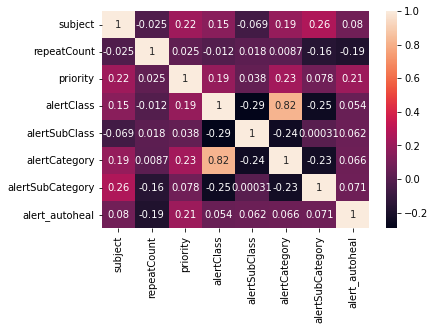

In [26]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

In [27]:
df = df.drop(columns = ['alertClass'])
df.head()

,subject,repeatCount,priority,alertSubClass,alertCategory,alertSubCategory,alert_autoheal
0,836,2,3,20,5,2,1
1,376,2,0,4,5,18,1
2,376,2,0,17,5,18,1
3,1987,2,1,15,2,38,1
4,376,2,0,9,5,18,1


In [28]:
df2 = df.drop(columns=['alert_autoheal'])
df2

,subject,repeatCount,priority,alertSubClass,alertCategory,alertSubCategory
0,836,2,3,20,5,2
1,376,2,0,4,5,18
2,376,2,0,17,5,18
3,1987,2,1,15,2,38
4,376,2,0,9,5,18
...,...,...,...,...,...,...
9989,1311,2,0,4,5,18
9991,1315,2,0,20,5,2
9992,1314,2,0,20,5,2
9998,3116,2,0,10,7,42


In [29]:
features = df2.iloc[:,:]
calc_vif(features)

,features,VIF_Value
0,subject,4.326011
1,repeatCount,7.383542
2,priority,3.671683
3,alertSubClass,6.081263
4,alertCategory,4.025881
5,alertSubCategory,5.024027


In [30]:
df.head()

,subject,repeatCount,priority,alertSubClass,alertCategory,alertSubCategory,alert_autoheal
0,836,2,3,20,5,2,1
1,376,2,0,4,5,18,1
2,376,2,0,17,5,18,1
3,1987,2,1,15,2,38,1
4,376,2,0,9,5,18,1


In [31]:
# assigning the independent features to X and the target variable to y
X = df.drop(columns = ['alert_autoheal'])
y = df['alert_autoheal']

In [32]:
X.head()

,subject,repeatCount,priority,alertSubClass,alertCategory,alertSubCategory
0,836,2,3,20,5,2
1,376,2,0,4,5,18
2,376,2,0,17,5,18
3,1987,2,1,15,2,38
4,376,2,0,9,5,18


In [33]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: alert_autoheal, dtype: int64

In [34]:
# OLS method
import statsmodels.formula.api as smf

In [35]:
import statsmodels.formula.api as smf
model = smf.ols("y~X", data = df).fit()
model.params

Intercept    0.767059
X[0]         0.000009
X[1]        -0.113353
X[2]         0.097131
X[3]         0.006308
X[4]         0.007213
X[5]         0.000740
dtype: float64

In [36]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     83.51
Date:                Sat, 08 Apr 2023   Prob (F-statistic):          3.28e-100
Time:                        09:56:25   Log-Likelihood:                -2531.2
No. Observations:                5238   AIC:                             5076.
Df Residuals:                    5231   BIC:                             5122.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7671      0.032     23.801      0.000       0.704       0.830
X[0]         8.97e-06   5.91e-06      1.517      0.129   -2.62e-06    2.06e-05
X[1]          -0.1134      0.008    -14.113      0.000      -0.129      -0.098
X[2]           0.0971      0.007     13.996      0.000       0.084       0.111
X[3]           0.0063      0.001      5.052      0.000       0.004       0.009
X[4]           0.0072      0.003      2.877      0.004       0.002       0.012
X[5]           0.0007      0.000      2.047      0.041    3.13e-05       0.001
==============================================================================
Omnibus:                      868.962   Durbin-Watson:                   1.420
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.966
Skew:                          -1.260   Prob(JB):                    6.67e-302
Kurtosis:                       3.080   Cond. No.                     1.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Split the dataset into Training and Testing datasets

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score

In [39]:
#spliting the data into training 77% and test 33%
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=42)

print('Shape of training data:',(X_train.shape))
print('Shape of testing data:',(X_test.shape))

Shape of training data: (3666, 6)
Shape of testing data: (1572, 6)


### KNN Before Balancing The Data

In [40]:
clf= KNeighborsClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy :",  round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_test, y_pred))

Accuracy : 0.81
Other Metrics:
              precision    recall  f1-score   support

           0       0.58      0.44      0.50       345
           1       0.85      0.91      0.88      1227

    accuracy                           0.81      1572
   macro avg       0.72      0.68      0.69      1572
weighted avg       0.79      0.81      0.80      1572



In [41]:
confusion_matrix(y_test,y_pred)

array([[ 152,  193],
       [ 108, 1119]])

In [42]:
y_pred

array([0, 0, 1, ..., 1, 1, 1])

In [43]:
pd.crosstab(y_test, y_pred)

col_0,0,1
alert_autoheal,,
0,152,193
1,108,1119


# Data Balancing

In [44]:
df['alert_autoheal'].value_counts()

1    4113
0    1125
Name: alert_autoheal, dtype: int64

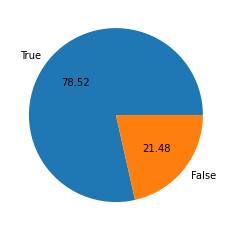

In [45]:
plt.pie(df['alert_autoheal'].value_counts(),labels=['True','False'],autopct='%0.2f')
plt.show()

Since the target variable is highly imbalanced, we will balance it using smote technique

In [46]:
from imblearn.over_sampling import SMOTEN
smote = SMOTEN()

In [47]:
X1, y1 = smote.fit_resample(X, y)

/home/ubuntu/.local/lib/python3.10/site-packages/imblearn/over_sampling/_smote/base.py:731: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(X_class[nn_indices[samples_indices]], axis=1).mode, axis=1


In [48]:
from collections import Counter
print("Before Smote: ", Counter(y_train))
print("After Smote: ", Counter(y1))

Before Smote:  Counter({1: 2886, 0: 780})
After Smote:  Counter({1: 4113, 0: 4113})


## Model Building

## KNeighbors Classifier

In [49]:
clf= KNeighborsClassifier()
clf.fit(X1,y1)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy :",  round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_test, y_pred))

print(pd.crosstab(y_test, y_pred))
print("\n\nR2 Score is: ",r2_score(y_test, y_pred))

Accuracy : 0.86
Other Metrics:
              precision    recall  f1-score   support

           0       0.72      0.60      0.65       345
           1       0.89      0.93      0.91      1227

    accuracy                           0.86      1572
   macro avg       0.80      0.77      0.78      1572
weighted avg       0.85      0.86      0.85      1572

col_0             0     1
alert_autoheal           
0               206   139
1                82  1145


R2 Score is:  0.1793061904255696


## Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression()
clf1.fit(X1,y1)
y_pred = clf1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy :",  round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_test, y_pred))

print(pd.crosstab(y_test, y_pred))
print("\n\nR2 Score is: ",r2_score(y_test, y_pred))

Accuracy : 0.67
Other Metrics:
              precision    recall  f1-score   support

           0       0.36      0.65      0.46       345
           1       0.87      0.67      0.76      1227

    accuracy                           0.67      1572
   macro avg       0.61      0.66      0.61      1572
weighted avg       0.76      0.67      0.69      1572

col_0             0    1
alert_autoheal          
0               225  120
1               405  822


R2 Score is:  -0.9496119910704794


/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
clf2 = DecisionTreeClassifier()
clf2.fit(X1,y1)
y_pred = clf2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy :",  round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_test, y_pred))

print(pd.crosstab(y_test, y_pred))
print("\n\nR2 Score is: ",r2_score(y_test, y_pred))

Accuracy : 0.93
Other Metrics:
              precision    recall  f1-score   support

           0       0.78      0.95      0.86       345
           1       0.99      0.93      0.95      1227

    accuracy                           0.93      1572
   macro avg       0.88      0.94      0.91      1572
weighted avg       0.94      0.93      0.93      1572

col_0             0     1
alert_autoheal           
0               328    17
1                91  1136


R2 Score is:  0.5989369618369299


## Support Vector Classifier

In [53]:
from sklearn.svm import SVC

In [54]:
clf3 = SVC()
clf3.fit(X1,y1)
y_pred = clf3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy :",  round(accuracy,2))

print("Other Metrics:")
print(classification_report(y_test, y_pred))

print(pd.crosstab(y_test, y_pred))
print("\n\nR2 Score is: ",r2_score(y_test, y_pred))

Accuracy : 0.51
Other Metrics:
              precision    recall  f1-score   support

           0       0.27      0.73      0.40       345
           1       0.86      0.45      0.59      1227

    accuracy                           0.51      1572
   macro avg       0.56      0.59      0.49      1572
weighted avg       0.73      0.51      0.55      1572

col_0             0    1
alert_autoheal          
0               253   92
1               675  552


R2 Score is:  -1.848290280287729
